In [6]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as plt

import warnings

warnings.filterwarnings('ignore')

from IPython import display

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


## Data Preprocessing :

In [7]:
df = pd.read_csv('rental-price-indexes-september-2023 (1).csv')
df.head()

,SER_REF,TIME_REF,DATA_VAL,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3
0,CPIM.SE1041F,2006.11,1000,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
1,CPIM.SE1041F,2006.12,995,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
2,CPIM.SE1041F,2007.01,1007,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
3,CPIM.SE1041F,2007.02,1012,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
4,CPIM.SE1041F,2007.03,1020,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow


## Data Preprocessing :

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SER_REF         1420 non-null   object 
 1   TIME_REF        1420 non-null   float64
 2   DATA_VAL        1420 non-null   int64  
 3   STATUS          1420 non-null   object 
 4   UNITS           1420 non-null   object 
 5   Subject         1420 non-null   object 
 6   Group           1420 non-null   object 
 7   Series_title_1  1420 non-null   object 
 8   Series_title_2  1420 non-null   object 
 9   Series_title_3  1420 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 111.1+ KB


In [9]:
df.describe()

,TIME_REF,DATA_VAL
count,1420.000000,1420.000000
mean,2014.864092,1316.606338
std,4.887636,217.285987
min,2006.110000,969.000000
25%,2011.010000,1122.000000
50%,2015.040000,1281.000000
75%,2019.070000,1481.000000
max,2023.090000,1987.000000


In [10]:
df.nunique()

SER_REF             7
TIME_REF          203
DATA_VAL          641
STATUS              1
UNITS               1
Subject             1
Group               2
Series_title_1      6
Series_title_2      1
Series_title_3      2
dtype: int64

In [11]:
df.axes

[RangeIndex(start=0, stop=1420, step=1),
 Index(['SER_REF', 'TIME_REF', 'DATA_VAL', 'STATUS', 'UNITS', 'Subject',
        'Group', 'Series_title_1', 'Series_title_2', 'Series_title_3'],
       dtype='object')]

In [12]:
df.shape

(1420, 10)

In [13]:
df.columns

Index(['SER_REF', 'TIME_REF', 'DATA_VAL', 'STATUS', 'UNITS', 'Subject',
       'Group', 'Series_title_1', 'Series_title_2', 'Series_title_3'],
      dtype='object')

In [14]:
df.shape

(1420, 10)

In [15]:
df.dtypes

SER_REF            object
TIME_REF          float64
DATA_VAL            int64
STATUS             object
UNITS              object
Subject            object
Group              object
Series_title_1     object
Series_title_2     object
Series_title_3     object
dtype: object

In [16]:
df.isna().sum()

SER_REF           0
TIME_REF          0
DATA_VAL          0
STATUS            0
UNITS             0
Subject           0
Group             0
Series_title_1    0
Series_title_2    0
Series_title_3    0
dtype: int64

## Data Visualization :

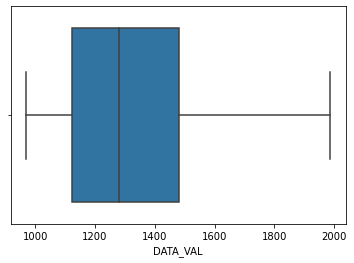

In [17]:
sns.boxplot(df['DATA_VAL'])

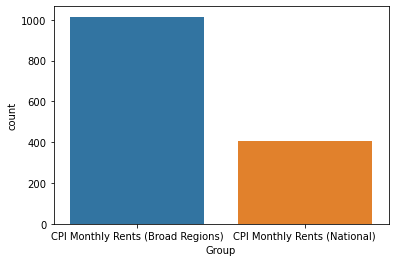

In [18]:
sns.countplot(df['Group'])

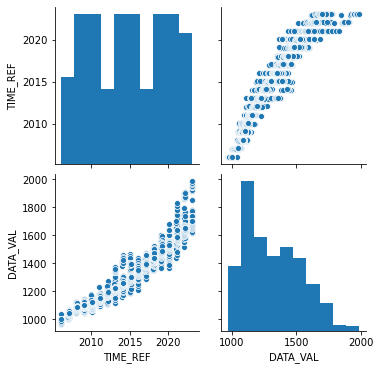

In [19]:
sns.pairplot(df)

## Compairing Numerical Feature with Categorical Features :

In [20]:
df.select_dtypes(include = 'object').head()

,SER_REF,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3
0,CPIM.SE1041F,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
1,CPIM.SE1041F,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
2,CPIM.SE1041F,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
3,CPIM.SE1041F,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
4,CPIM.SE1041F,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow


In [21]:
df.select_dtypes(exclude = 'object').head()

,TIME_REF,DATA_VAL
0,2006.11,1000
1,2006.12,995
2,2007.01,1007
3,2007.02,1012
4,2007.03,1020


## Using groupby :

In [23]:
df.groupby('Group').first().head()

,SER_REF,TIME_REF,DATA_VAL,STATUS,UNITS,Subject,Series_title_1,Series_title_2,Series_title_3
Group,,,,,,,,,
CPI Monthly Rents (Broad Regions),CPIM.SE1041F,2006.11,1000,FINAL,Index,CPI,Auckland,Actual rentals for housing,Flow
CPI Monthly Rents (National),CPIM.SE9041F,2006.11,1000,FINAL,Index,CPI,National,Actual rentals for housing,Flow


## Compairing two features :

In [24]:
pd.crosstab(df['SER_REF'],df['TIME_REF']).head()

TIME_REF,2006.11,2006.12,2007.01,2007.02,2007.03,2007.04,2007.05,2007.06,2007.07,2007.08,2007.09,2007.10,2007.11,2007.12,2008.01,2008.02,2008.03,2008.04,2008.05,2008.06,2008.07,2008.08,2008.09,2008.10,2008.11,2008.12,2009.01,2009.02,2009.03,2009.04,2009.05,2009.06,2009.07,2009.08,2009.09,2009.10,2009.11,2009.12,2010.01,2010.02,2010.03,2010.04,2010.05,2010.06,2010.07,2010.08,2010.09,2010.10,2010.11,2010.12,2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,2011.07,2011.08,2011.09,2011.10,2011.11,2011.12,2012.01,2012.02,2012.03,2012.04,2012.05,2012.06,2012.07,2012.08,2012.09,2012.10,2012.11,2012.12,2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,2013.09,2013.10,2013.11,2013.12,2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,2014.09,2014.10,2014.11,2014.12,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,2015.09,2015.10,2015.11,2015.12,2016.01,2016.02,2016.03,2016.04,2016.05,2016.06,2016.07,2016.08,2016.09,2016.10,2016.11,2016.12,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.10,2018.11,2018.12,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.10,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09
SER_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CPIM.SE1041F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CPIM.SE2041F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CPIM.SE3041F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CPIM.SE5041F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CPIM.SE6041F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Handling Outliers :

In [ ]:
There is no outliers present in the data to handle.

## Linearity :

In [49]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df.dtypes

SER_REF            object
TIME_REF          float64
DATA_VAL            int64
STATUS             object
UNITS              object
Subject            object
Group              object
Series_title_1     object
Series_title_2     object
Series_title_3     object
dtype: object

In [51]:
df.head()

,SER_REF,TIME_REF,DATA_VAL,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3
0,CPIM.SE1041F,2006.11,1000,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
1,CPIM.SE1041F,2006.12,995,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
2,CPIM.SE1041F,2007.01,1007,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
3,CPIM.SE1041F,2007.02,1012,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
4,CPIM.SE1041F,2007.03,1020,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow


In [52]:
# Convert all numeric columns to numeric data type
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for remaining non-numeric values
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['SER_REF', 'STATUS', 'UNITS', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3'],
      dtype='object')


In [53]:
r = df.corr()
r

,TIME_REF,DATA_VAL
TIME_REF,1.000000,0.952783
DATA_VAL,0.952783,1.000000


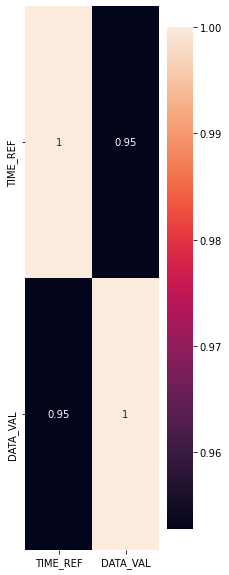

In [54]:
plt.figure(figsize = (3,10))
sns.heatmap(r,annot = True)

## Multicollinearity :

In [55]:
df1 = df.drop('DATA_VAL',axis = 1)
df1.head()

,SER_REF,TIME_REF,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3
0,CPIM.SE1041F,2006.11,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
1,CPIM.SE1041F,2006.12,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
2,CPIM.SE1041F,2007.01,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
3,CPIM.SE1041F,2007.02,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow
4,CPIM.SE1041F,2007.03,FINAL,Index,CPI,CPI Monthly Rents (Broad Regions),Auckland,Actual rentals for housing,Flow


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model Building :

In [60]:
from sklearn.linear_model import LinearRegression

In [70]:
x = df.drop('DATA_VAL',axis = 1)
y = df['DATA_VAL']


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2 , random_state=42)

In [73]:
model = LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_train = model.predict(x_train)